In [262]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn.tree import  DecisionTreeClassifier
import matplotlib.pyplot as plt

car_seats = pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\Decision Trees\\Company_Data.csv",header=0)

sales_category=[]

for value in car_seats['Sales']:
    if (value >= 7.5) :
        sales_category.append('Greater than or Equal to 7.5')
    else:
        sales_category.append('Lesser than 7.5')

modified_car_seats=car_seats.drop(['Sales'],axis=1)
modified_car_seats['Sales']=pd.Series(sales_category)

encoder=preprocessing.LabelEncoder()
modified_car_seats['ShelveLoc']=encoder.fit_transform(modified_car_seats['ShelveLoc'])
modified_car_seats['Education']=encoder.fit_transform(modified_car_seats['Education'])
modified_car_seats['Urban']=encoder.fit_transform(modified_car_seats['Urban'])
modified_car_seats['US']=encoder.fit_transform(modified_car_seats['US'])

features=modified_car_seats.columns[0:10]
output=modified_car_seats.columns[10]
modified_car_seats

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,0,42,7,1,1,Greater than or Equal to 7.5
1,111,48,16,260,83,1,65,0,1,1,Greater than or Equal to 7.5
2,113,35,10,269,80,2,59,2,1,1,Greater than or Equal to 7.5
3,117,100,4,466,97,2,55,4,1,1,Lesser than 7.5
4,141,64,3,340,128,0,38,3,1,0,Lesser than 7.5
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,4,1,1,Greater than or Equal to 7.5
396,139,23,3,37,120,2,55,1,0,1,Lesser than 7.5
397,162,26,12,368,159,2,40,8,1,1,Lesser than 7.5
398,100,79,7,284,95,0,50,2,1,1,Lesser than 7.5


In [263]:
train_data,test_data = train_test_split(modified_car_seats,test_size = 0.2,random_state=8)

#Decision Tree Model Training and prediction
model_DT = DecisionTreeClassifier(criterion = 'gini',max_depth = 4,min_samples_split=15)
model_DT.fit(train_data[features],train_data[output])
preds = model_DT.predict(test_data[features])

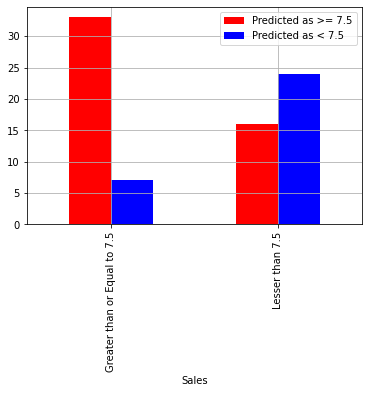

In [264]:
#Plot to analyse variation between the Predicted values and the Actual Values on Test Dataset
pd.crosstab(test_data[output],preds).plot(kind='bar',color=['red','blue'], grid=True)
plt.legend(['Predicted as >= 7.5','Predicted as < 7.5'])
plt.show()   

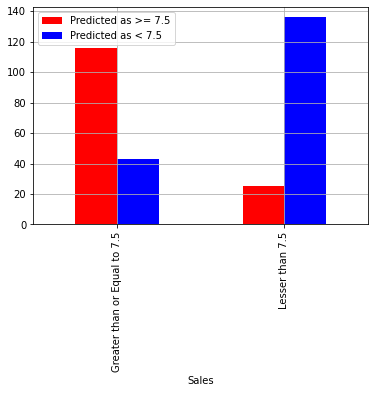

In [265]:
#Plot to analyse variation between the Predicted values and the Actual Values on Train Dataset
pd.crosstab(train_data[output],model_DT.predict(train_data[features])).plot(kind='bar',color=['red','blue'], grid=True)
plt.legend(['Predicted as >= 7.5','Predicted as < 7.5'])
plt.show()
# pd.crosstab(train_data[output],model_DT.predict(train_data[features]))

In [266]:
# Train Accuracy
print("Train Accuracy achieved by DT Algorithm(%): ",np.mean(train_data.Sales == model_DT.predict(train_data[features]))*100)

# Test Accuracy
print("Test Accuracy achieved by DT Algorithm(%): ",np.mean(preds==test_data.Sales)*100)

Train Accuracy achieved by DT Algorithm(%):  78.75
Test Accuracy achieved by DT Algorithm(%):  71.25
